In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Reading and initial cleaning

In [2]:
df = pd.read_csv('train.csv')

df.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [3]:
type(df['datetime'][0])

str

In [4]:
appendvr2df = pd.get_dummies(df['var2'],drop_first=True)
appendvr2df.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [5]:
df = pd.concat([df.drop('var2',axis=1),appendvr2df], axis=1)

df.head()

,ID,datetime,temperature,var1,pressure,windspeed,electricity_consumption,B,C
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,216.0,0,0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,210.0,0,0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,225.0,0,0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,216.0,0,0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,222.0,0,0


In [6]:
df.isnull().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
electricity_consumption    0
B                          0
C                          0
dtype: int64

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year
df['time'] = df['datetime'].dt.time

df.head()

,ID,datetime,temperature,var1,pressure,windspeed,electricity_consumption,B,C,day,month,year,time
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,216.0,0,0,1,7,2013,00:00:00
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,210.0,0,0,1,7,2013,01:00:00
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,225.0,0,0,1,7,2013,02:00:00
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,216.0,0,0,1,7,2013,03:00:00
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,222.0,0,0,1,7,2013,04:00:00


In [8]:
df.drop('datetime',axis = 1,inplace = True)

In [9]:
df.head()

,ID,temperature,var1,pressure,windspeed,electricity_consumption,B,C,day,month,year,time
0,0,-11.4,-17.1,1003.0,571.910,216.0,0,0,1,7,2013,00:00:00
1,1,-12.1,-19.3,996.0,575.040,210.0,0,0,1,7,2013,01:00:00
2,2,-12.9,-20.0,1000.0,578.435,225.0,0,0,1,7,2013,02:00:00
3,3,-11.4,-17.1,995.0,582.580,216.0,0,0,1,7,2013,03:00:00
4,4,-11.4,-19.3,1005.0,586.600,222.0,0,0,1,7,2013,04:00:00


In [10]:
df['time'].apply(lambda x : x.hour).nunique()

#df.head()

24

In [11]:
df['hour'] = df['time'].apply(lambda x : x.hour)

df.head()

,ID,temperature,var1,pressure,windspeed,electricity_consumption,B,C,day,month,year,time,hour
0,0,-11.4,-17.1,1003.0,571.910,216.0,0,0,1,7,2013,00:00:00,0
1,1,-12.1,-19.3,996.0,575.040,210.0,0,0,1,7,2013,01:00:00,1
2,2,-12.9,-20.0,1000.0,578.435,225.0,0,0,1,7,2013,02:00:00,2
3,3,-11.4,-17.1,995.0,582.580,216.0,0,0,1,7,2013,03:00:00,3
4,4,-11.4,-19.3,1005.0,586.600,222.0,0,0,1,7,2013,04:00:00,4


In [12]:
df.drop('time',axis =1 , inplace = True)

In [13]:
df.head()

,ID,temperature,var1,pressure,windspeed,electricity_consumption,B,C,day,month,year,hour
0,0,-11.4,-17.1,1003.0,571.910,216.0,0,0,1,7,2013,0
1,1,-12.1,-19.3,996.0,575.040,210.0,0,0,1,7,2013,1
2,2,-12.9,-20.0,1000.0,578.435,225.0,0,0,1,7,2013,2
3,3,-11.4,-17.1,995.0,582.580,216.0,0,0,1,7,2013,3
4,4,-11.4,-19.3,1005.0,586.600,222.0,0,0,1,7,2013,4


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 12 columns):
ID                         26496 non-null int64
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
electricity_consumption    26496 non-null float64
B                          26496 non-null uint8
C                          26496 non-null uint8
day                        26496 non-null int64
month                      26496 non-null int64
year                       26496 non-null int64
hour                       26496 non-null int64
dtypes: float64(5), int64(5), uint8(2)
memory usage: 2.1 MB


# Data Exploration

In [15]:
df.groupby('year').mean()['electricity_consumption']

year
2013    295.394022
2014    299.665761
2015    304.025362
2016    299.554801
2017    284.990942
Name: electricity_consumption, dtype: float64

In [16]:
df.corr()['electricity_consumption'].sort_values()

windspeed                 -0.238883
temperature               -0.117254
hour                      -0.021404
year                      -0.019869
C                         -0.019401
ID                        -0.009491
pressure                   0.000907
month                      0.040761
B                          0.052972
day                        0.097964
var1                       0.133914
electricity_consumption    1.000000
Name: electricity_consumption, dtype: float64

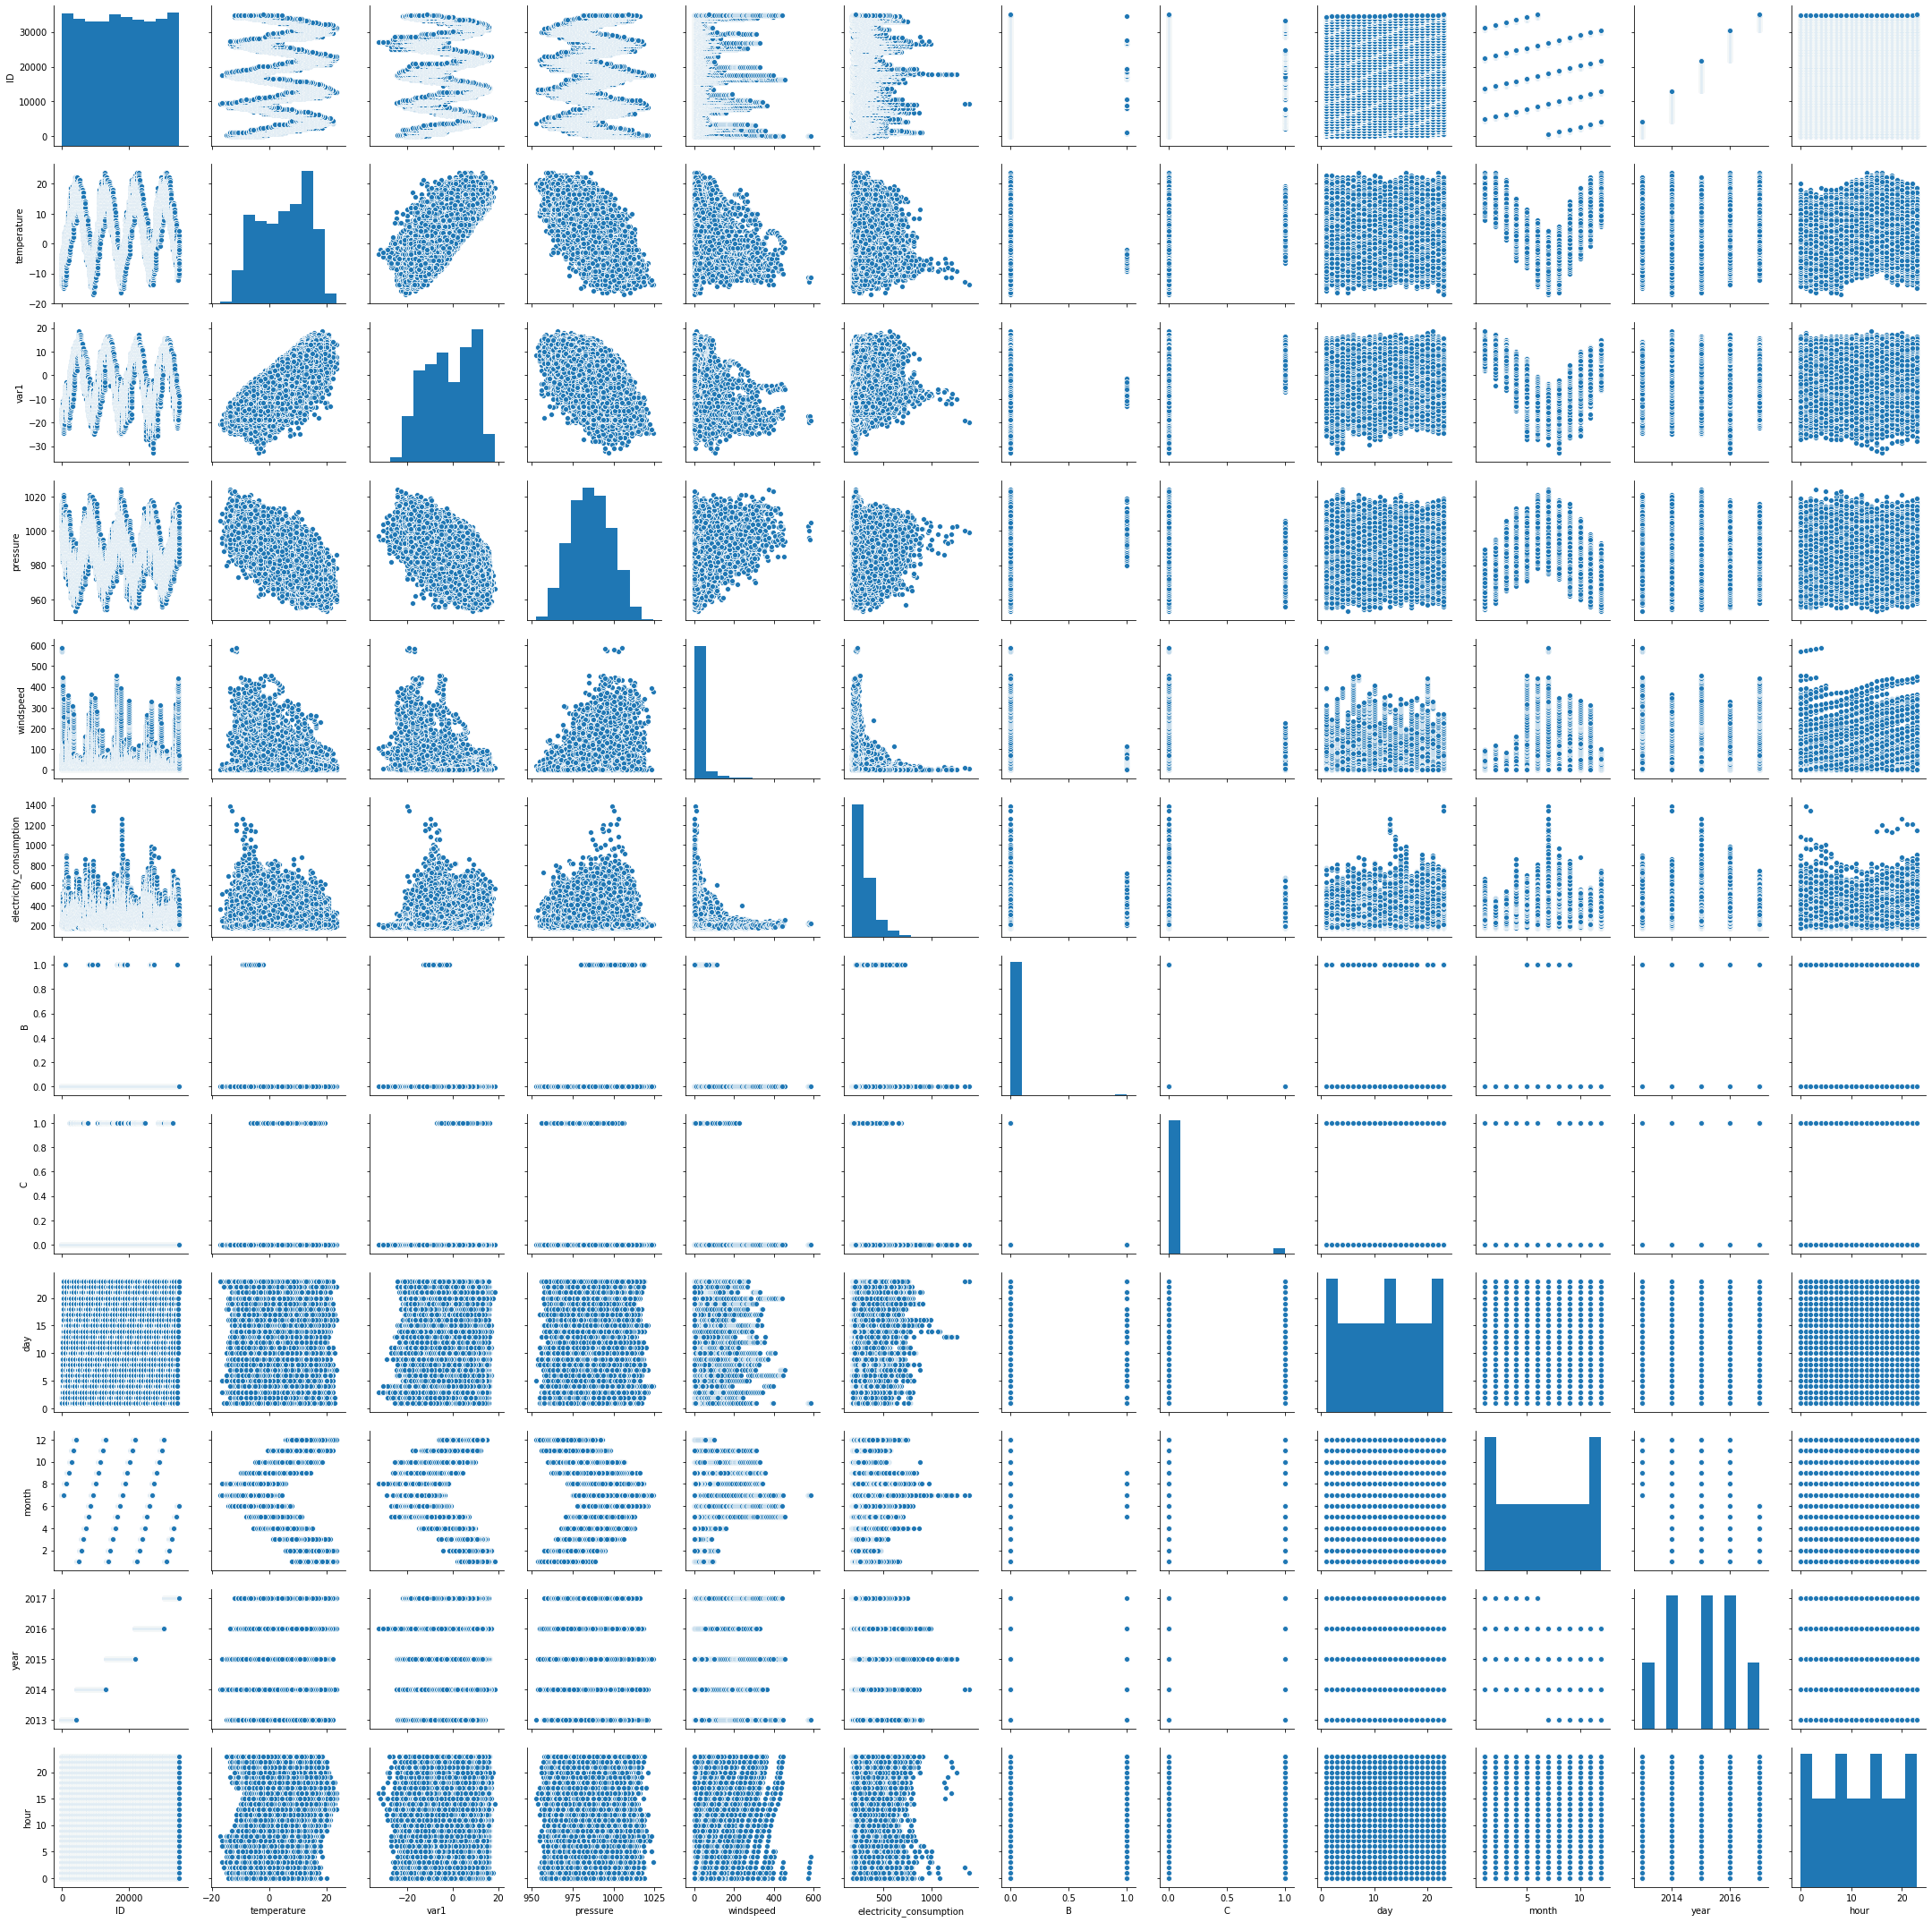

In [32]:
sns.pairplot(data = df)

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['ID','electricity_consumption'],axis = 1)
y = df['electricity_consumption']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
predictions = lr.predict(X_test)

In [22]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE: 94.62542129607479


# Checking for test dataset

In [23]:
testdf = pd.read_csv('test.csv')

appendvr2testdf = pd.get_dummies(testdf['var2'],drop_first=True)
testdf = pd.concat([testdf.drop('var2',axis=1),appendvr2testdf], axis=1)

testdf['datetime'] = pd.to_datetime(testdf['datetime'])

testdf['day'] = testdf['datetime'].dt.day
testdf['month'] = testdf['datetime'].dt.month
testdf['year'] = testdf['datetime'].dt.year
testdf['time'] = testdf['datetime'].dt.time

testdf.drop('datetime',axis = 1,inplace = True)

testdf['hour'] = testdf['time'].apply(lambda x : x.hour)
testdf.drop('time',axis =1 , inplace = True)



In [24]:
testdf.head()

,ID,temperature,var1,pressure,windspeed,B,C,day,month,year,hour
0,552,-10.0,-16.4,1011.0,263.280,0,0,24,7,2013,0
1,553,-10.0,-20.7,1011.0,267.175,0,0,24,7,2013,1
2,554,-10.7,-17.1,1003.0,269.555,0,0,24,7,2013,2
3,555,-13.6,-20.7,1008.0,273.060,0,0,24,7,2013,3
4,556,-10.7,-17.1,1006.0,1.765,0,0,24,7,2013,4


In [25]:
testdf.columns

Index(['ID', 'temperature', 'var1', 'pressure', 'windspeed', 'B', 'C', 'day',
       'month', 'year', 'hour'],
      dtype='object')

In [26]:
X_test = testdf.drop(['ID'],axis = 1)

In [27]:
predictionstest = lr.predict(X_test)

In [28]:
submission = pd.DataFrame(predictionstest,columns=['electricity_consumption'])

In [29]:
submission.head()

,electricity_consumption
0,232.772196
1,200.173400
2,236.061175
3,235.047396
4,337.559437


In [30]:
finalsubmission = pd.concat([testdf[['ID']],submission],axis=1)

In [31]:
finalsubmission.to_csv('submission1.csv',index=False)